In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install JPype1
!pip install rhinoMorph

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 252 kB in 5s (54.3 kB/s)
Reading package li

In [3]:
chat_dir='/content/gdrive/MyDrive/pytest/data/'

In [4]:
def read_data(filename, encoding='cp949'):
  with open(filename, 'r', encoding=encoding) as f:
    data = [line.split('\t') for line in f.read().splitlines()]
  return data

def write_data(data, filename, encoding='cp949'):
  with open(filename, 'w', encoding=encoding) as f:
    f.write(data)

In [5]:
import rhinoMorph
rn=rhinoMorph.startRhino()

data=read_data(chat_dir+'data.txt',encoding='cp949')

filepath:  /usr/local/lib/python3.7/dist-packages
classpath:  /usr/local/lib/python3.7/dist-packages/rhinoMorph/lib/rhino.jar
RHINO started!


In [6]:
print('자료타입: ', type(data))
print('전체 문장수: ',len(data))
print('형태소 분석 전 모습: ', data[:20])
print(data[1])

자료타입:  <class 'list'>
전체 문장수:  6322
형태소 분석 전 모습:  [['저희 안경원 코드 번호 확인이 가능할까요?', '매장코드'], ['저희 안경원 코드를 잊어버렸습니다', '매장코드'], ['안경원 코드번호 확인이 어렵습니다 어떻게 해야하나요?', '매장코드'], ['매장 코드번호 확인이 어렵습니다 어떻게 해야하나요?', '매장코드'], ['안경원 코드번호 확인하는 방법이 있을까요?', '매장코드'], ['안경원 코드번호 조회부탁드립니다', '매장코드'], ['저희 안경원 코드 확인부탁드려요', '매장코드'], ['안경원 코드 번호를 잊어버렸어요 확인부탁드려요', '매장코드'], ['안경원 코드 번호 확인을 어디에서 확인 할 수 있나요?', '매장코드'], ['저희 안경원 코드 어떻게 확인 할 수 있나요?', '매장코드'], ['저희 매장 코드 번호 확인하고싶어요', '매장코드'], ['매장 코드 번호 어디에서 볼 수 있나요?', '매장코드'], ['매장 코드 번호 확인하고싶어요 어디에서 볼 수 있나요?', '매장코드'], ['매장 코드 번호 조회는 어디에서 할 수 있나요?', '매장코드'], ['매장 코드 번호 어떻게 알 수 있나요?', '매장코드'], ['매장 번호 확인하고싶어요 어디에서 볼 수 있나요?', '매장코드'], ['코드번호 까먹었습니다', '매장코드'], ['코드번호 잊어버렸습니다', '매장코드'], ['코드번호 잊어버렸을땐 어떻게 해야하죠?', '매장코드'], ['매장 코드 번호 잊어버렸습니다 어떻게 확인하죠?', '매장코드']]
['저희 안경원 코드를 잊어버렸습니다', '매장코드']


In [7]:
morphed_data=''
for data_each in data:
  morphed_data_each=rhinoMorph.onlyMorph_list(rn, data_each[0], pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'VX', 'XR', 'IC', 'MM', 'MAG'])
  print("morphed_data_each: ", morphed_data_each)
  joined_data_each=' '.join(morphed_data_each)
  if joined_data_each:
    morphed_data+=joined_data_each+'\t'+data_each[1]+'\n'
print('Morphological Analysis Completed.')

write_data(morphed_data, chat_dir+'chat_morphed.txt', encoding='cp949')

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
morphed_data_each:  ['어떤', '제품', '교환', '확인', '부탁', '드리']
morphed_data_each:  ['교환', '신청', '내역', '조회', '부탁', '드리']
morphed_data_each:  ['교환', '신청', '내역', '조회', '주']
morphed_data_each:  ['교환', '신청', '내역', '조회', '어디', '하']
morphed_data_each:  ['교환', '내역', '조회', '있']
morphed_data_each:  ['교환', '내역', '조회', '있']
morphed_data_each:  ['교환', '내역', '조회', '하', '있']
morphed_data_each:  ['교환', '내역', '조회', '있']
morphed_data_each:  ['교환', '내역', '조회', '있']
morphed_data_each:  ['교환', '내역', '조회', '있']
morphed_data_each:  ['교환', '내역', '조회', '있']
morphed_data_each:  ['교환', '내역', '조회', '어떻하', '하']
morphed_data_each:  ['교환', '내역', '조회', '어떻하', '하']
morphed_data_each:  ['교환', '내역', '조회', '어떻하', '하']
morphed_data_each:  ['교환', '내역', '조회', '어떻하', '하']
morphed_data_each:  ['교환', '내역', '조회', '어떻하', '하', '있']
morphed_data_each:  ['교환', '내역', '조회', '어떻하', '하', '있']
morphed_data_each:  ['교환', '내역', '조회', '어떻하', '하', '있']
morphed_data_each:  ['교환', '내역', '조회', '어떻하', '하', '있', '알리

In [8]:
print(data[0])

['저희 안경원 코드 번호 확인이 가능할까요?', '매장코드']


In [9]:
joined_data_each

'제품 배송비 없 주문 금액 얼마'

In [10]:
type(joined_data_each)

str

In [12]:
data=read_data(chat_dir+'chat_morphed.txt', encoding='cp949')

In [13]:
data_text=[line[0] for line in data]
data_label=[line[1] for line in data]

from sklearn.model_selection import train_test_split
train_data_text, test_data_text, train_data_label, test_data_label= train_test_split(data_text, data_label, stratify=data_label)

In [14]:
from collections import Counter 
train_data_label_freq=Counter(train_data_label)
print('train_data_label_freq: ', train_data_label_freq)

test_data_label_freq=Counter(test_data_label)
print('test_data_label_freq: ', test_data_label_freq)

train_data_label_freq:  Counter({'반품문의': 1422, '교환문의': 989, '배송문의': 705, '담당자문의': 517, '샘플문의': 460, '매장코드': 234, '배송비': 192, '청구금액': 107, '제품가격': 75, '제품불일치': 40})
test_data_label_freq:  Counter({'반품문의': 474, '교환문의': 330, '배송문의': 236, '담당자문의': 172, '샘플문의': 153, '매장코드': 78, '배송비': 64, '청구금액': 36, '제품가격': 25, '제품불일치': 13})


In [15]:
import numpy as np 
text_len=[len(line.split(' ')) for line in train_data_text]
print("최소길이: ",np.min(text_len))

최소길이:  2


In [16]:
print("평균길이: ", np.round(np.mean(text_len)))
print("구간별 최대 길이: ", np.percentile(text_len,[0,25,50,75,90,100]))

평균길이:  6.0
구간별 최대 길이:  [ 2.  5.  6.  7.  8. 18.]


In [30]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math
max_words=1000
maxlen=20

tokenizer=Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index=tokenizer.word_index

In [31]:
print('word_index', word_index)

word_index {'하': 1, '확인': 2, '어떻하': 3, '있': 4, '제품': 5, '반품': 6, '어디': 7, '교환': 8, '가능': 9, '주': 10, '달': 11, '조회': 12, '이번': 13, '배송': 14, '주문': 15, '알리': 16, '내역': 17, '영업': 18, '되': 19, '샘플': 20, '신청': 21, '언제': 22, '번호': 23, '담당자': 24, '마감일': 25, '싶': 26, '개봉': 27, '회수': 28, '당일': 29, '도착': 30, '금액': 31, '상품': 32, '코드': 33, '받': 34, '궁금': 35, '시간': 36, '드리': 37, '알': 38, '배송비': 39, '개수': 40, '연락처': 41, '부탁': 42, '사원': 43, '대상': 44, '일정': 45, '저희': 46, '지': 47, '정하': 48, '얼마': 49, '매장': 50, '보': 51, '없이': 52, '방법': 53, '방문': 54, '품목': 55, '여부': 56, '안경원': 57, '요청': 58, '수량': 59, '환불': 60, '소비자': 61, '청구': 62, '수령일': 63, '능': 64, '이상': 65, '날짜': 66, '공급가': 67, '한': 68, '문의': 69, '얼마나': 70, '통화': 71, '전화': 72, '동일': 73, '청구서': 74, '법': 75, '않': 76, '대금': 77, '저번': 78, '이력': 79, '없': 80, '수': 81, '같': 82, '지금': 83, '붙': 84, '포장': 85, '마감': 86, '일자': 87, '그룹': 88, '안': 89, '박스': 90, '바꾸': 91, '내부': 92, '가': 93, '표기': 94, '필요': 95, '어떤': 96, '후': 97, '일치': 98, '외부': 99, '확': 100, '연결': 1

In [32]:
word_index
train_data_text

['배송비 없이 주문 하 얼마나 주문',
 '반품 금액 얼마 알리 주',
 '교환 내역 조회 주',
 '상품 수령일 알리 주',
 '영업 담당자 번호 확인 어떻하 하 되',
 '교환 이력 조회 필요',
 '반품 대상 품목 정하 지 있 알리 주',
 '이번 달 샘플 수량 어떻하 되',
 '반품 가능 상품 정하 지 알 싶',
 '반품 가능 상품 어떻하 확인 있',
 '반품 신청 내역 보 법 알리 주',
 '당일 배송 제품 언제 도착 하',
 '제품 배송 조회 하 방법 궁금',
 '반품 금액 확인 부탁 드리',
 '제품 배송비 없이 주문 하',
 '안경원 코드 번호 확인 어떻하 확인 있',
 '교환 내역 조회 어디 확인 가능 하',
 '영업 담당자 번호 확인 어떻하 하 되',
 '저희 안경원 코드 확인 부탁 드리',
 '제품 공급가 소비자 확인 어떻하 하 있',
 '이번 달 샘플 개수 어디 확인',
 '이번 달 반품 마감일 확인 어떻하 하 하',
 '배송 언제 되',
 '반품 신청 회수 언제 하',
 '얼마나 더 주문 배송비 없이 주문 있',
 '반품 신청 내역 보 방법 알리 주',
 '매장 코드 번호 확인 어렵 어떻하 하 하',
 '반품 수거 언제',
 '지금 주문 언제 받 있',
 '이번 달 샘플 개수 어디 확인 하 있',
 '저희 매장 샘플 받 싶 어디 신청 있',
 '제품 배송비 없이 주문 얼마 이상 주문 하',
 '개봉 되 제품 교환 싶',
 '이번 달 청구 금액 어디 확인',
 '제품 배송비 없이 주문 싶 얼마나 주문',
 '반품 가능 하 제품 정하 지 있',
 '영업 담당자 번호 확인 어떻하 하 되',
 '이번 달 샘플 수량 확인 싶 어디 확인 가능',
 '제품 교환 어떻하 하 있',
 '영업 담당자 연락처 확인 어떻하 하 하',
 '이번 달 반품 마감일 언제',
 '반품 회수 언제 되 어떻하 알 있',
 '이번 달 반품 마감일 언제',
 '교환 내역 조회 어떻하 하 있',
 '샘플 신청 어디 하 하',
 '반품 가능 상품 정하 지 있',
 '샘플 신청

In [33]:
data=tokenizer.texts_to_sequences(train_data_text)

In [35]:
print("data: ",data)

data:  [[39, 52, 15, 1, 70, 15], [6, 31, 49, 16, 10], [8, 17, 12, 10], [32, 63, 16, 10], [18, 24, 23, 2, 3, 1, 19], [8, 79, 12, 95], [6, 44, 55, 48, 47, 4, 16, 10], [13, 11, 20, 59, 3, 19], [6, 9, 32, 48, 47, 38, 26], [6, 9, 32, 3, 2, 4], [6, 21, 17, 51, 75, 16, 10], [29, 14, 5, 22, 30, 1], [5, 14, 12, 1, 53, 35], [6, 31, 2, 42, 37], [5, 39, 52, 15, 1], [57, 33, 23, 2, 3, 2, 4], [8, 17, 12, 7, 2, 9, 1], [18, 24, 23, 2, 3, 1, 19], [46, 57, 33, 2, 42, 37], [5, 67, 61, 2, 3, 1, 4], [13, 11, 20, 40, 7, 2], [13, 11, 6, 25, 2, 3, 1, 1], [14, 22, 19], [6, 21, 28, 22, 1], [70, 142, 15, 39, 52, 15, 4], [6, 21, 17, 51, 53, 16, 10], [50, 33, 23, 2, 125, 3, 1, 1], [6, 111, 22], [83, 15, 22, 34, 4], [13, 11, 20, 40, 7, 2, 1, 4], [46, 50, 20, 34, 26, 7, 21, 4], [5, 39, 52, 15, 49, 65, 15, 1], [27, 19, 5, 8, 26], [13, 11, 62, 31, 7, 2], [5, 39, 52, 15, 26, 70, 15], [6, 9, 1, 5, 48, 47, 4], [18, 24, 23, 2, 3, 1, 19], [13, 11, 20, 59, 2, 26, 7, 2, 9], [5, 8, 3, 1, 4], [18, 24, 41, 2, 3, 1, 1], [13, 11,

In [36]:
len_d=[len(d) for d in data]

In [37]:
print("길이: ",len_d)

길이:  [6, 5, 4, 4, 7, 4, 8, 6, 7, 6, 7, 6, 6, 5, 5, 7, 7, 7, 6, 7, 6, 8, 3, 5, 7, 7, 8, 3, 5, 8, 8, 8, 5, 6, 7, 7, 7, 9, 5, 7, 5, 7, 5, 6, 5, 6, 5, 8, 7, 7, 8, 4, 7, 7, 8, 5, 7, 8, 3, 4, 5, 5, 7, 6, 8, 6, 6, 6, 4, 7, 3, 7, 6, 6, 6, 6, 6, 4, 7, 5, 7, 5, 4, 7, 7, 5, 6, 7, 3, 6, 8, 5, 6, 8, 4, 4, 4, 5, 6, 5, 6, 7, 7, 6, 5, 8, 8, 5, 8, 6, 6, 5, 6, 7, 8, 5, 6, 5, 5, 9, 6, 7, 7, 5, 9, 8, 8, 6, 4, 8, 7, 10, 8, 8, 5, 8, 7, 10, 7, 8, 6, 9, 7, 5, 9, 6, 4, 6, 8, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 6, 6, 6, 5, 7, 5, 8, 7, 7, 4, 7, 8, 7, 6, 5, 6, 8, 6, 6, 6, 6, 7, 6, 7, 4, 9, 7, 7, 9, 5, 6, 8, 5, 7, 7, 8, 7, 6, 6, 7, 7, 6, 6, 6, 5, 7, 10, 6, 3, 6, 8, 5, 7, 9, 7, 7, 7, 4, 4, 8, 5, 6, 3, 7, 6, 7, 6, 6, 6, 7, 6, 7, 6, 9, 6, 8, 5, 7, 4, 8, 7, 7, 3, 5, 7, 8, 6, 7, 5, 6, 7, 9, 7, 5, 9, 5, 7, 7, 7, 7, 6, 9, 7, 6, 6, 9, 5, 6, 7, 7, 6, 5, 6, 8, 9, 7, 5, 6, 5, 4, 7, 3, 4, 7, 7, 7, 8, 6, 8, 6, 6, 7, 4, 4, 7, 7, 7, 5, 8, 5, 8, 4, 8, 8, 3, 7, 8, 6, 6, 4, 4, 7, 8, 7, 6, 8, 7, 7, 4, 6, 6, 4, 6, 6, 7, 4, 3, 7, 7, 6, 6, 6

In [38]:
data=pad_sequences(data, maxlen=maxlen)
print('data 0: ', data[0])
print('data 0의 길이: ', len(data[0]))

data 0:  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 39 52 15  1 70 15]
data 0의 길이:  20


In [39]:
print(data)

[[ 0  0  0 ...  1 70 15]
 [ 0  0  0 ... 49 16 10]
 [ 0  0  0 ... 17 12 10]
 ...
 [ 0  0  0 ...  2 42 37]
 [ 0  0  0 ...  7  2  1]
 [ 0  0  0 ...  6 25 22]]


In [40]:
sample=[[5,6,7],[8,9,10]]
arr=np.zeros((len(sample),10+1))

In [41]:
for i, seq in enumerate(sample):
  arr[i,seq]=1.

In [42]:
arr

array([[0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.]])

In [43]:
def to_one_hot(sequences, dimension):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results


In [44]:
x_train=to_one_hot(data, dimension=max_words)

In [45]:
print('train_data_text type: ',type(train_data_text))

train_data_text type:  <class 'list'>


In [46]:
print(len(train_data_text[0]))

18


In [47]:
print('data type: ', type(x_train))
print(len(x_train[0]))
print('x_train [0][0:100]: ', x_train[0][0:100])

data type:  <class 'numpy.ndarray'>
1000
x_train [0][0:100]:  [1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


In [48]:
def labelToIint(labels):
  for count, label in enumerate(labels):
    if label == "배송비":
      labels[count] = 0
    elif label == "담당자문의":
      labels[count] = 1
    elif label == "제품가격":
      labels[count] = 2
    elif label == "배송문의":
      labels[count] = 3
    elif label == "매장코드":
      labels[count] = 4
    elif label == "샘플문의":
      labels[count] = 5
    elif label == "제품불일치":
       labels[count] = 6 
    elif label == "반품문의":
       labels[count] = 7   
    elif label == "교환문의":
      labels[count] = 8
    elif label == "청구금액":
      labels[count] = 9
  return labels

In [49]:
print("훈련데이터 label 치환 전:\n", train_data_label)
labels = labelToIint(train_data_label)
print("치환 후:", labels)

print("\n테스트데이터 label 치환 전:\n", test_data_label)
labels_val = labelToIint(test_data_label)
print("치환 후:", labels_val)

훈련데이터 label 치환 전:
 ['배송비', '반품문의', '교환문의', '배송문의', '담당자문의', '교환문의', '반품문의', '샘플문의', '반품문의', '반품문의', '반품문의', '배송문의', '배송문의', '반품문의', '배송비', '매장코드', '교환문의', '담당자문의', '매장코드', '제품가격', '샘플문의', '반품문의', '배송문의', '반품문의', '배송비', '반품문의', '매장코드', '반품문의', '배송문의', '샘플문의', '샘플문의', '배송비', '교환문의', '청구금액', '배송비', '반품문의', '담당자문의', '샘플문의', '교환문의', '담당자문의', '반품문의', '반품문의', '반품문의', '교환문의', '샘플문의', '반품문의', '샘플문의', '청구금액', '샘플문의', '담당자문의', '배송문의', '교환문의', '반품문의', '반품문의', '배송문의', '반품문의', '배송문의', '샘플문의', '반품문의', '교환문의', '반품문의', '반품문의', '담당자문의', '반품문의', '배송문의', '반품문의', '담당자문의', '반품문의', '교환문의', '매장코드', '샘플문의', '교환문의', '배송문의', '교환문의', '교환문의', '샘플문의', '교환문의', '샘플문의', '샘플문의', '교환문의', '담당자문의', '샘플문의', '배송문의', '교환문의', '담당자문의', '교환문의', '배송비', '담당자문의', '배송문의', '교환문의', '샘플문의', '배송문의', '담당자문의', '반품문의', '반품문의', '교환문의', '반품문의', '반품문의', '샘플문의', '교환문의', '매장코드', '샘플문의', '반품문의', '매장코드', '담당자문의', '샘플문의', '배송문의', '교환문의', '반품문의', '담당자문의', '반품문의', '샘플문의', '교환문의', '교환문의', '샘플문의', '반품문의', '교환문의', '담당자문의', '배송비', '반품문의', '반품문의', '배송문의

In [50]:
class_number=10

y_train=to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [51]:
data_test=tokenizer.texts_to_sequences(test_data_text)

In [52]:
data_test=pad_sequences(data_test, maxlen=maxlen)

x_test=to_one_hot(data_test, dimension=max_words)
y_test=to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [53]:
print('훈련 데이터 본문 텐서의 크기: ', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기: ', y_train.shape)

훈련 데이터 본문 텐서의 크기:  (4741, 1000)
훈련 데이터 레이블 텐서의 크기:  (4741, 10)


In [54]:
print('테스트 데이터 텐서의 크기: ',x_test.shape)
print('테스트 레이블 텐서의 크기: ', y_test.shape)

테스트 데이터 텐서의 크기:  (1581, 1000)
테스트 레이블 텐서의 크기:  (1581, 10)


In [55]:
epochs=20
batch_size=32
model_name='train_data_morphed.h5'
tokenizer_name='train_data_morphed.pickle'

모델 설계

In [56]:
from keras.models import Sequential
from keras.layers import Dense,Embedding, Flatten
model=Sequential()

model.add(Dense(64, activation='relu', input_shape=(max_words,)))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=class_number,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                64064     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 66,474
Trainable params: 66,474
Non-trainable params: 0
_________________________________________________________________


In [57]:
from keras.callbacks import EarlyStopping
import os

In [58]:
path='/content/gdrive/MyDrive/pytest/data/'
checkpoint_path=path+'models/'
checkpoint_dir=os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
  print("{} -- Folder already exists\n".format(checkpoint_dir))
else:
  os.makedirs(checkpoint_dir, exist_ok=True)
  print("{} -- Folder created\n".format(checkpoint_dir))

/content/gdrive/MyDrive/pytest/data/models -- Folder already exists



In [59]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
from keras.callbacks import ModelCheckpoint
earlystop_callback = EarlyStopping(monitor='val_acc', patience=1)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name, monitor='val_acc',
verbose=1, save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_test, y_test), callbacks=[earlystop_callback, cp_callback], verbose=1)
history_dict = history.history

Epoch 1/20
141/149 [===========================>..] - ETA: 0s - loss: 0.8891 - acc: 0.8469
Epoch 1: val_acc improved from -inf to 0.97976, saving model to /content/gdrive/MyDrive/pytest/data/models/train_data_morphed.h5
149/149 [==============================] - 2s 10ms/step - loss: 0.8526 - acc: 0.8530 - val_loss: 0.1329 - val_acc: 0.9798
Epoch 2/20
149/149 [==============================] - ETA: 0s - loss: 0.0449 - acc: 0.9943
Epoch 2: val_acc improved from 0.97976 to 0.99747, saving model to /content/gdrive/MyDrive/pytest/data/models/train_data_morphed.h5
149/149 [==============================] - 1s 4ms/step - loss: 0.0449 - acc: 0.9943 - val_loss: 0.0136 - val_acc: 0.9975
Epoch 3/20
136/149 [==========================>...] - ETA: 0s - loss: 0.0044 - acc: 0.9995
Epoch 3: val_acc improved from 0.99747 to 1.00000, saving model to /content/gdrive/MyDrive/pytest/data/models/train_data_morphed.h5
149/149 [==============================] - 1s 4ms/step - loss: 0.0043 - acc: 0.9996 - val_l

In [60]:
type(history)

keras.callbacks.History

In [61]:
import pickle

with open(tokenizer_name, 'wb') as file:
  pickle.dump(tokenizer, file,protocol=pickle.HIGHEST_PROTOCOL)

In [62]:
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

In [63]:
loss

[0.852628231048584,
 0.04489734023809433,
 0.004311769735068083,
 0.0007264157757163048]

In [64]:
acc

[0.852984607219696, 0.9943050146102905, 0.9995781183242798, 1.0]

In [65]:
val_loss

[0.13288606703281403,
 0.01363834273070097,
 0.002120943507179618,
 0.00046961219049990177]

In [66]:
print('Validation accuracy of each epoch:', np.round(val_acc, 3))
epochs = range(1, len(val_acc) + 1)

Validation accuracy of each epoch: [0.98  0.997 1.    1.   ]


In [67]:
epochs

range(1, 5)

<function matplotlib.pyplot.show>

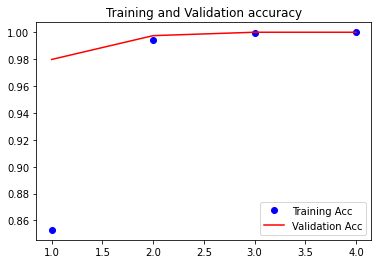

In [68]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation accuracy')
plt.legend(loc=4)
plt.show

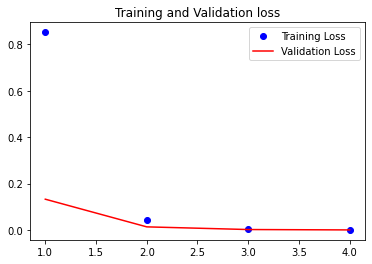

In [69]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [71]:
from keras.models import load_model
path="/content/gdrive/MyDrive/pytest/data/models/"
loaded_model = load_model(path+model_name)
with open(tokenizer_name, 'rb') as handle:
  loaded_tokenizer = pickle.load(handle)

In [72]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('prediction model loss & acc:', test_eval)

50/50 [==============================] - 0s 3ms/step - loss: 0.0021 - acc: 1.0000
prediction model loss & acc: [0.002120943507179618, 1.0]


In [83]:
def intToLabel(label_int):
  labels = ''
  if label_int == 0:
    labels = '20,000원 이상 주문하시면 배송비가 없습니다'
  elif label_int == 1:
    labels = '담당자는 홈페이지에 사번을 넣으시면 자세한 정보를 알 수 있습니다'
  elif label_int == 2:
    labels = '공급가와 소비자가는 홈페이지 > … > 가격조회 에서 확인 가능합니다'
  elif label_int == 9:
    labels = '청구금액은 매달 12일 이후에 홈페이지 > … > 청구금액에서 확인 가능합니다'
  return labels


In [84]:
user_input=input("내용을 입력하세요: ")
morphed_input, poses=rhinoMorph.wholeResult_list(rn, user_input, pos=['NNG', 'NNP', 'NP', 'VV', 'VA', 'XR', 'VCN', 'MAG', 'MAJ', 'IC'])

내용을 입력하세요: 제품을 교환하고 싶어요


In [85]:
morphed_input

['제품', '교환']

In [86]:
poses

['NNG', 'XR']

In [87]:
text=[morphed_input]

In [88]:
text

[['제품', '교환']]

In [90]:
data = loaded_tokenizer.texts_to_sequences(text)
data = pad_sequences(data, maxlen=maxlen)
x_test = to_one_hot(data, dimension=max_words)
prediction = loaded_model.predict(x_test)
label_int = np.argmax(prediction)
label = intToLabel(label_int)
print(label)